In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("Iris.csv", index_col = 'Id')

In [55]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
dfx = np.array(df.iloc[:, 0:4])
dfy = np.array(df['Species'])

In [5]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(dfx, dfy, train_size = 0.8, test_size = 0.2)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
K = int(trainx.shape[0]**0.5)
KVal = []
Error = []
for k in range(3, K, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(trainx, trainy.values.ravel())
    pred = knn.predict(testx)
    score = accuracy_score(testy, pred)
    KVal.append(k)
    Error.append(1 - score)

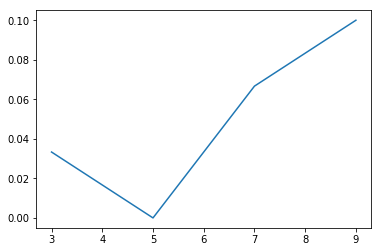

In [19]:
plt.plot(KVal, Error)

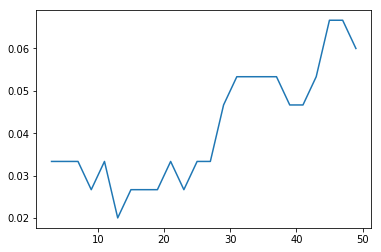

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
neighbors = range(3, 50, 2)
cvscore = []
for k in range(3, K, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, dfx, dfy, cv = 10, scoring = 'accuracy')
    cvscore.append(score.mean())

MSE = [1 - s for s in cvscore]
plt.plot(neighbors, MSE)

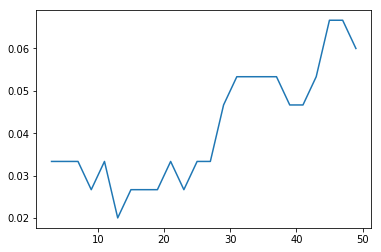

In [67]:
plt.plot(x, y)